# Initializing the API and testing out some data visualization.

In [ ]:
!pip install alpaca-trade-api
!pip install mpl_finance

In [45]:
from config import *
import alpaca_trade_api as alpacaapi

# matplotlib will be used for charting
from mpl_finance import candlestick_ohlc
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
from matplotlib.dates import MONDAY, DateFormatter, DayLocator, WeekdayLocator

api = alpacaapi.REST(api_key, api_secret, base_url)

The code above initializes the api and connects it to the website. api variable will have all of the data and functionality.

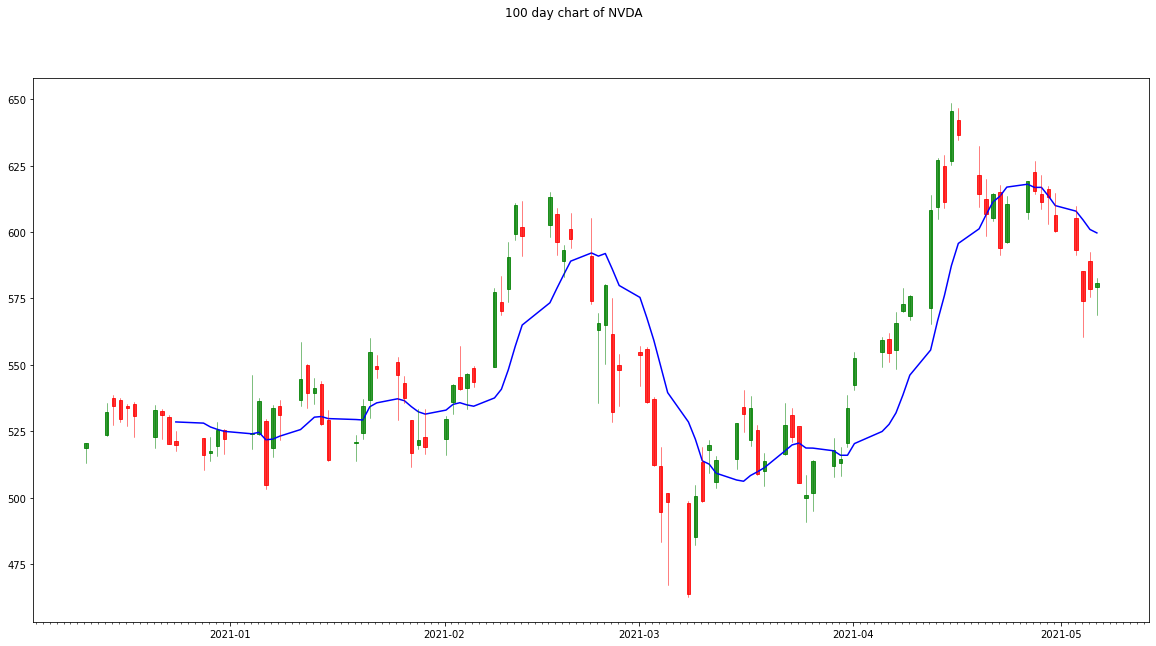

In [46]:
# creates our dataframe and quotes for the candlesticks
stock = 'NVDA'
limit = 100
# Currently only does days, converting it to any smaller
# division of time ruins the proportions of the candles.
candles = 'day'
period = 10

df = api.get_barset(stock, candles, limit).df[stock]
quotes = zip(mpl_dates.date2num(df.index.to_pydatetime()),
df.open, df.high, df.low, df.close)

fig, ax = plt.subplots(figsize=(20,10))
fig.suptitle('{} day chart of {}'.format(limit, stock))
ax.xaxis_date()
ax.autoscale_view()

# Probable cause of the time proportion problem. Need alternative for
# DayLocator(). Found minute and hour locators in documentation but need
# to think of a way to type it efficiently.
alldays = DayLocator()
ax.xaxis.set_minor_locator(alldays)

# Added a moving average indicator, variable can be changed at the top
# to specify a time-range relative to the range of the chart.
SMA = df.close.rolling(period).mean()
ax.plot(mpl_dates.date2num(df.index.to_pydatetime()), SMA, color='blue', label='SMA')

candlestick_ohlc(ax, quotes, width=0.5, colorup='g', colordown='r', alpha=0.8);

The code above generates a simple candlestick chart of whatever symbol is fed into the top variable. Although it works I would like to do a better, more detail oriented method that generates a better looking chart.

In [ ]:
rs = df.close.rolling(period).